In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import optuna

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,matthews_corrcoef, precision_recall_curve,roc_auc_score




In [55]:
class DNN_1(nn.Module):
    def __init__(self, input_dim,dropout_rate=0.35):
        super(DNN_1, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout = nn.Dropout(dropout_rate)
        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout(x)
        
        x = torch.relu(self.layer2(x))
        x = self.dropout(x)

        x = torch.relu(self.layer3(x))
        x = self.dropout(x)

        x = torch.relu(self.layer4(x))
        x = self.dropout(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [56]:
class DNN_2(nn.Module):
    def __init__(self, input_dim,dropout1=0.35,dropout2=0.5,dropout3=0.25,dropout4=0.1):
        super(DNN_2, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32,16)
        self.layer4 = nn.Linear(16,8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        self.dropout3 = nn.Dropout(dropout3)
        self.dropout4 = nn.Dropout(dropout4)

        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        
        x = torch.relu(self.layer2(x))
        x = self.dropout2(x)

        x = torch.relu(self.layer3(x))
        x = self.dropout3(x)

        x = torch.relu(self.layer4(x))
        x = self.dropout4(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [57]:
class DNN_3(nn.Module):
    def __init__(self, input_dim,dropout1=0.15,dropout2=0.45):
        super(DNN_3, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        
        x = torch.relu(self.layer2(x))
        x = self.dropout1(x)

        x = torch.relu(self.layer3(x))
        x = self.dropout2(x)

        x = torch.relu(self.layer4(x))
    

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [58]:
class DNN_4(nn.Module):
    def __init__(self, input_dim,dropout1=0.0,dropout2=0.1):
        super(DNN_4, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        
        x = torch.relu(self.layer2(x))
    

        x = torch.relu(self.layer3(x))
        

        x = torch.relu(self.layer4(x))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x

In [59]:
class DNN_5(nn.Module):
    def __init__(self, input_dim,dropout_rate=0.2):
        super(DNN_5, self).__init__()
        self.layer1 = nn.Linear(input_dim,128)
        self.layer2 = nn.Linear(128,64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 16)
        self.output_layer = nn.Linear(16, 1)

        self.dropout = nn.Dropout(dropout_rate)
        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout(x)
        
        x = torch.relu(self.layer2(x))
        x = self.dropout(x)

        x = torch.relu(self.layer3(x))
        x = self.dropout(x)

        x = torch.relu(self.layer4(x))
        x = self.dropout(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [60]:
class DNN_6(nn.Module):
    def __init__(self, input_dim,dropout1=0.45,dropout2=0.35,dropout3=0.3,dropout4=0.3):
        super(DNN_6, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32,16)
        self.layer4 = nn.Linear(16,8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        self.dropout3 = nn.Dropout(dropout3)
        self.dropout4 = nn.Dropout(dropout4)

        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        
        x = torch.relu(self.layer2(x))
        x = self.dropout2(x)

        x = torch.relu(self.layer3(x))
        x = self.dropout3(x)

        x = torch.relu(self.layer4(x))
        x = self.dropout4(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [61]:
class DNN_7(nn.Module):
    def __init__(self, input_dim,dropout1=0.4,dropout2=0.1):
        super(DNN_7, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        
        x = torch.relu(self.layer2(x))
        x = self.dropout1(x)

        x = torch.relu(self.layer3(x))
        x = self.dropout2(x)

        x = torch.relu(self.layer4(x))
    

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [62]:
class DNN_8(nn.Module):
    def __init__(self, input_dim,dropout1=0.4,dropout2=0.2):
        super(DNN_8, self).__init__()
        self.layer1 = nn.Linear(input_dim,128)
        self.layer2 = nn.Linear(128,64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 16)
        self.output_layer = nn.Linear(16, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        
        x = torch.relu(self.layer2(x))
    

        x = torch.relu(self.layer3(x))
        

        x = torch.relu(self.layer4(x))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [63]:
class DNN_9(nn.Module):
    def __init__(self, input_dim):
        super(DNN_9, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)


        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        
        x = torch.relu(self.layer2(x))

        x = torch.relu(self.layer3(x))

        x = torch.relu(self.layer4(x))

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [64]:
class DNN_10(nn.Module):
    def __init__(self, input_dim):
        super(DNN_10, self).__init__()
        self.layer1 = nn.Linear(input_dim,128)
        self.layer2 = nn.Linear(128,64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 16)

        self.output_layer=nn.Linear(16,1)
        
        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        
        x = torch.relu(self.layer2(x))
        
        x = torch.relu(self.layer3(x))
        
        x = torch.relu(self.layer4(x))

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [65]:
class DNN_11(nn.Module):
    def __init__(self, input_dim,dropout1=0.5,dropout2=0.1):
        super(DNN_11, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        
        x = torch.relu(self.layer2(x))
    

        x = torch.relu(self.layer3(x))
        x = self.dropout2(x)

        x = torch.relu(self.layer4(x))
        
        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [66]:
class DNN_12(nn.Module):
    def __init__(self, input_dim,dropout1=0.2,dropout2=0.25):
        super(DNN_12, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
    
        
        x = torch.relu(self.layer2(x))
        x = self.dropout1(x)

        x = torch.relu(self.layer3(x))
        

        x = torch.relu(self.layer4(x))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [67]:
class DNN_13(nn.Module):
    def __init__(self, input_dim,dropout1=0.05,dropout2=0.3):
        super(DNN_13, self).__init__()
        self.layer1 = nn.Linear(input_dim,128)
        self.layer2 = nn.Linear(128,64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 16)
        self.output_layer = nn.Linear(16, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        
        x = torch.relu(self.layer2(x))
    

        x = torch.relu(self.layer3(x))
        x = self.dropout2(x)

        x = torch.relu(self.layer4(x))
        
        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [68]:
class DNN_14(nn.Module):
    def __init__(self, input_dim,dropout1=0.4,dropout2=0.3):
        super(DNN_14, self).__init__()
        self.layer1 = nn.Linear(input_dim,128)
        self.layer2 = nn.Linear(128,64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 16)
        self.output_layer = nn.Linear(16, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        
        x = torch.relu(self.layer2(x))
    

        x = torch.relu(self.layer3(x))
        

        x = torch.relu(self.layer4(x))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [69]:
df=pd.read_csv('../../data/learning_data.csv',index_col=0)

X=df.drop(columns='dengue',axis=1).values
y=df['dengue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

X_train_tensor=torch.tensor(X_train, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train, dtype=torch.float32)
X_test_tensor=torch.tensor(X_test, dtype=torch.float32)
y_test_tensor=torch.tensor(y_test, dtype=torch.float32)

In [70]:
# デバイス設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_paths = [
    "../../saved_model/DNN_1.pth",
    "../../saved_model/DNN_2.pth",
    "../../saved_model/DNN_3.pth",
    "../../saved_model/DNN_4.pth",
    "../../saved_model/DNN_6.pth",
    "../../saved_model/DNN_7.pth",
    "../../saved_model/DNN_11.pth"]

model_classes = {0: DNN_1,
                 1: DNN_2,
                 2: DNN_3,
                 3: DNN_4,
                 4: DNN_6,
                 5: DNN_7,
                 6: DNN_11}

models=[]

for i, path in enumerate(model_paths):
    if i in model_classes:
        model = model_classes[i](input_dim=X_train.shape[1]).to(device)
        model.load_state_dict(torch.load(path, map_location=device))
        model.eval()
        models.append(model)

/tmp/ipykernel_1242972/692632169.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path, map_location=device))


In [71]:
train_outputs = []
test_outputs = []

with torch.no_grad():
    for model in models:
        model.eval()
        
        train_output = model(X_train_tensor.to(device))
        train_outputs.append(train_output)
        
        # テストデータの出力
        test_output = model(X_test_tensor.to(device))
        test_outputs.append(test_output)

train_DL_features = torch.cat(train_outputs, dim=1)  
test_DL_features = torch.cat(test_outputs, dim=1) 

# 出力形状の確認
print(f"Train DL Features Shape: {train_DL_features.shape}")
print(f"Test DL Features Shape: {test_DL_features.shape}")


Train DL Features Shape: torch.Size([3508, 7])
Test DL Features Shape: torch.Size([878, 7])


In [72]:
train_DL_features_np = train_DL_features.cpu().numpy()

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(train_DL_features_np.reshape(-1, train_DL_features_np.shape[-1]))

# KMeans クラスタリング
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_features)

# クラスタリング特徴量を修正
cluster_features = kmeans_labels.reshape(-1, 1) 

# PCA（主成分分析）
pca = PCA(n_components=5)
pca_features = pca.fit_transform(normalized_features)  

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(normalized_features) 

# 距離から類似度を計算
distance_matrix = cdist(normalized_features, normalized_features, metric='euclidean')
similarity_features = 1 / (1 + distance_matrix) 

# 距離から類似度の平均特徴量を生成
similarity_features_mean = similarity_features.mean(axis=1).reshape(-1, 1) 

all_features = np.hstack([normalized_features,cluster_features,pca_features,tsne_features,similarity_features_mean])

print(f"all_features.shape: {all_features.shape}")
print(f"train_DL_features_np.shape: {train_DL_features_np.shape}")

scaler_standard = StandardScaler()
train_standardized_features = scaler_standard.fit_transform(all_features)

print(f"train_standardized_features.shape: {train_standardized_features.shape}")

all_features.shape: (3508, 16)
train_DL_features_np.shape: (3508, 7)
train_standardized_features.shape: (3508, 16)


In [73]:
test_DL_features_np = test_DL_features.cpu().numpy()

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(test_DL_features_np.reshape(-1, test_DL_features_np.shape[-1]))

# KMeans クラスタリング
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_features)

# クラスタリング特徴量を修正
cluster_features = kmeans_labels.reshape(-1, 1) 

# PCA（主成分分析）
pca = PCA(n_components=5)
pca_features = pca.fit_transform(normalized_features)  

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(normalized_features) 

# 距離から類似度を計算
distance_matrix = cdist(normalized_features, normalized_features, metric='euclidean')
similarity_features = 1 / (1 + distance_matrix) 

# 距離から類似度の平均特徴量を生成
similarity_features_mean = similarity_features.mean(axis=1).reshape(-1, 1) 

all_features = np.hstack([normalized_features,cluster_features,pca_features,tsne_features,similarity_features_mean])

print(f"all_features.shape: {all_features.shape}")
print(f"test_DL_features_np.shape: {train_DL_features_np.shape}")

scaler_standard = StandardScaler()
test_standardized_features = scaler_standard.fit_transform(all_features)

print(f"test_standardized_features.shape: {test_standardized_features.shape}")

all_features.shape: (878, 16)
test_DL_features_np.shape: (3508, 7)
test_standardized_features.shape: (878, 16)


In [74]:
X_train, X_val, y_train, y_val = train_test_split(train_standardized_features, y_train, test_size=0.1,random_state=42)

In [75]:
X_train_tensor=torch.tensor(X_train, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train, dtype=torch.float32)
X_val_tensor=torch.tensor(X_val, dtype=torch.float32)
y_val_tensor=torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(test_standardized_features, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [76]:
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=4, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=4, shuffle=False)

In [77]:
class DNN(nn.Module):
    def __init__(self, input_dim,dropout1,dropout2,dropout3):
        super(DNN, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.output_layer = nn.Linear(16, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        self.dropout3 = nn.Dropout(dropout3)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)

        x = torch.relu(self.layer2(x))
        x = self.dropout2(x)

        x = torch.relu(self.layer3(x))
        x = self.dropout3(x)
        
        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [78]:
def objective(trial):
    # ハイパーパラメータのサンプリング
    dropout1 = trial.suggest_float("dropout1", 0, 0.5, step=0.05)
    dropout2 = trial.suggest_float("dropout2", 0, 0.5, step=0.05)
    dropout3 = trial.suggest_float("dropout3", 0, 0.5, step=0.05)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)  
    weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)   

    # モデル定義
    model = DNN(
        input_dim=X_train_tensor.shape[1],
        dropout1=dropout1,
        dropout2=dropout2,
        dropout3=dropout3
    ).to(device)

    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Early Stoppingの設定
    patience = 10
    best_val_loss = float('inf')
    patience_counter = 0

    # 訓練ループ
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch.squeeze())
            loss.backward()
            optimizer.step()

        # バリデーション評価
        model.eval()
        val_loss = 0
        val_true, val_pred = [], []
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = model(X_val).squeeze()
                val_loss += criterion(val_outputs, y_val.squeeze()).item()
                predictions = (val_outputs >0.49).float()
                val_true.extend(y_val.cpu().numpy())
                val_pred.extend(predictions.cpu().numpy())

        val_loss /= len(val_loader)

        # Early Stopping判定
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        # Optunaへのログ
        trial.report(val_loss, epoch)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    # 最終的な評価指標を計算
    mcc = matthews_corrcoef(val_true, val_pred)
    print(f"Final MCC: {mcc:.4f}")

    return mcc  


In [79]:
device_id = 0  # 使用するGPUのID（0または1）
torch.cuda.set_device(device_id)
device = torch.device(f"cuda:{device_id}" if torch.cuda.is_available() else "cpu")

# Optunaの設定
study = optuna.create_study(direction="maximize")  
study.optimize(objective, n_trials=100)

# 結果表示
print("Best Parameters: ", study.best_params)
print("Best Validation F1: ", study.best_value)

[I 2024-12-11 17:01:01,314] A new study created in memory with name: no-name-3afcfea2-3d66-492c-8c8f-85db3a8dc327
/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:02:02,412] Trial 0 finished with value: 0.0 and parameters: {'dropout1': 0.05, 'dropout2': 0.05, 'dropout3': 0.30000000000000004, 'learning_rate': 0.009328092739387785, 'weight_decay': 2.2565764375237657e-05}. Best is trial 0 with value:

Early stopping at epoch 21
Final MCC: 0.0000


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:02:37,242] Trial 1 finished with value: 0.1718545350771247 and parameters: {'dropout1': 0.0, 'dropout2': 0.30000000000000004, 'dropout3': 0.1, 'learning_rate': 0.008605425712435407, 'weight_decay': 4.613574938540244e-05}. Best is trial 1 with value: 0.1718545350771247.


Early stopping at epoch 11
Final MCC: 0.1719


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:03:26,358] Trial 2 finished with value: 0.18998022666296369 and parameters: {'dropout1': 0.5, 'dropout2': 0.15000000000000002, 'dropout3': 0.5, 'learning_rate': 3.3215314541297874e-05, 'weight_decay': 5.339398798509174e-05}. Best is trial 2 with value: 0.18998022666296369.


Early stopping at epoch 16
Final MCC: 0.1900


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:03:59,461] Trial 3 finished with value: 0.18963697309676392 and parameters: {'dropout1': 0.25, 'dropout2': 0.1, 'dropout3': 0.5, 'learning_rate': 0.0016471146827151991, 'weight_decay': 8.53523944832579e-05}. Best is trial 2 with value: 0.18998022666296369.


Early stopping at epoch 10
Final MCC: 0.1896


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:04:54,037] Trial 4 finished with value: 0.20158105227158785 and parameters: {'dropout1': 0.1, 'dropout2': 0.35000000000000003, 'dropout3': 0.15000000000000002, 'learning_rate': 0.001865112785079919, 'weight_decay': 1.0110357697307151e-05}. Best is trial 4 with value: 0.20158105227158785.


Early stopping at epoch 17
Final MCC: 0.2016


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:04:56,864] Trial 5 pruned. 
[I 2024-12-11 17:05:41,661] Trial 6 finished with value: 0.17628281326351936 and parameters: {'dropout1': 0.1, 'dropout2': 0.35000000000000003, 'dropout3': 0.4, 'learning_rate': 2.641756394508829e-05, 'weight_decay': 0.001960134213768537}. Best is trial 4 with value: 0.20158105227158785.


Early stopping at epoch 15
Final MCC: 0.1763


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:05:44,426] Trial 7 pruned. 
[I 2024-12-11 17:05:47,513] Trial 8 pruned. 
[I 2024-12-11 17:06:42,719] Trial 9 pruned. 
[I 2024-12-11 17:06:45,870] Trial 10 pruned. 
[I 2024-12-11 17:06:49,027] Trial 11 pruned. 
[I 2024-12-11 17:06:51,702] Trial 12 pruned. 
[I 2024-12-11 17:06:54,765] Trial 13 pruned. 
[I 2024-12-11 17:06:57,541] Trial 14 pruned. 
[I 

Early stopping at epoch 16
Final MCC: 0.1547


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:08:45,917] Trial 20 pruned. 
[I 2024-12-11 17:08:48,953] Trial 21 pruned. 
[I 2024-12-11 17:08:51,858] Trial 22 pruned. 
[I 2024-12-11 17:08:54,718] Trial 23 pruned. 
[I 2024-12-11 17:08:57,163] Trial 24 pruned. 
[I 2024-12-11 17:09:00,224] Trial 25 pruned. 
[I 2024-12-11 17:09:03,253] Trial 26 pruned. 
[I 2024-12-11 17:09:44,614] Trial 27 finished 

Early stopping at epoch 13
Final MCC: 0.1682


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:09:47,735] Trial 28 pruned. 
[I 2024-12-11 17:09:50,925] Trial 29 pruned. 
[I 2024-12-11 17:09:53,478] Trial 30 pruned. 
[I 2024-12-11 17:10:44,691] Trial 31 finished with value: 0.16229399602102734 and parameters: {'dropout1': 0.1, 'dropout2': 0.45, 'dropout3': 0.4, 'learning_rate': 2.7926922918663443e-05, 'weight_decay': 0.0017731357643198734}. Be

Early stopping at epoch 16
Final MCC: 0.1623


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:10:47,652] Trial 32 pruned. 
[I 2024-12-11 17:10:50,805] Trial 33 pruned. 
[I 2024-12-11 17:10:53,851] Trial 34 pruned. 
[I 2024-12-11 17:11:45,306] Trial 35 finished with value: 0.16693656613933466 and parameters: {'dropout1': 0.05, 'dropout2': 0.2, 'dropout3': 0.4, 'learning_rate': 1.7602937740219926e-05, 'weight_decay': 0.0004976064654111945}. Be

Early stopping at epoch 17
Final MCC: 0.1669


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:11:47,435] Trial 36 pruned. 
[I 2024-12-11 17:11:49,956] Trial 37 pruned. 
[I 2024-12-11 17:12:45,476] Trial 38 pruned. 
[I 2024-12-11 17:12:48,632] Trial 39 pruned. 
[I 2024-12-11 17:12:51,244] Trial 40 pruned. 
[I 2024-12-11 17:12:53,846] Trial 41 pruned. 
[I 2024-12-11 17:12:56,804] Trial 42 pruned. 
[I 2024-12-11 17:12:59,906] Trial 43 pruned. 


Early stopping at epoch 12
Final MCC: 0.1577


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:13:49,185] Trial 49 pruned. 
[I 2024-12-11 17:13:51,053] Trial 50 pruned. 
[I 2024-12-11 17:13:53,389] Trial 51 pruned. 
[I 2024-12-11 17:13:56,429] Trial 52 pruned. 
[I 2024-12-11 17:13:59,624] Trial 53 pruned. 
[I 2024-12-11 17:14:02,154] Trial 54 pruned. 
[I 2024-12-11 17:14:40,222] Trial 55 finished with value: 0.1545671221853584 and parameters:

Early stopping at epoch 12
Final MCC: 0.1546


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:14:43,198] Trial 56 pruned. 
[I 2024-12-11 17:14:46,047] Trial 57 pruned. 
[I 2024-12-11 17:15:42,510] Trial 58 pruned. 
[I 2024-12-11 17:15:45,216] Trial 59 pruned. 
[I 2024-12-11 17:15:48,290] Trial 60 pruned. 
[I 2024-12-11 17:16:44,169] Trial 61 pruned. 
[I 2024-12-11 17:16:46,677] Trial 62 pruned. 
[I 2024-12-11 17:17:34,518] Trial 63 finished 

Early stopping at epoch 15
Final MCC: 0.1607


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:18:31,501] Trial 64 pruned. 
[I 2024-12-11 17:18:34,221] Trial 65 pruned. 
[I 2024-12-11 17:18:37,176] Trial 66 pruned. 
[I 2024-12-11 17:18:40,365] Trial 67 pruned. 
[I 2024-12-11 17:18:43,488] Trial 68 pruned. 
[I 2024-12-11 17:18:46,520] Trial 69 pruned. 
[I 2024-12-11 17:18:49,422] Trial 70 pruned. 
[I 2024-12-11 17:18:52,519] Trial 71 pruned. 


Early stopping at epoch 13
Final MCC: 0.1804


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:19:40,063] Trial 74 pruned. 
[I 2024-12-11 17:19:42,975] Trial 75 pruned. 
[I 2024-12-11 17:19:45,947] Trial 76 pruned. 
[I 2024-12-11 17:19:49,122] Trial 77 pruned. 
[I 2024-12-11 17:19:52,148] Trial 78 pruned. 
[I 2024-12-11 17:19:55,290] Trial 79 pruned. 
[I 2024-12-11 17:20:42,063] Trial 80 finished with value: 0.16683392460785923 and parameters

Early stopping at epoch 15
Final MCC: 0.1668


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:20:44,537] Trial 81 pruned. 
[I 2024-12-11 17:20:47,459] Trial 82 pruned. 
[I 2024-12-11 17:20:49,860] Trial 83 pruned. 
[I 2024-12-11 17:20:52,935] Trial 84 pruned. 
[I 2024-12-11 17:20:55,406] Trial 85 pruned. 
[I 2024-12-11 17:20:57,639] Trial 86 pruned. 
[I 2024-12-11 17:21:00,923] Trial 87 pruned. 
[I 2024-12-11 17:21:03,994] Trial 88 pruned. 


Early stopping at epoch 16
Final MCC: 0.1669


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:22:57,060] Trial 93 finished with value: 0.17453667657193656 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.5, 'dropout3': 0.35000000000000003, 'learning_rate': 2.322643760288257e-05, 'weight_decay': 0.0007803212665137703}. Best is trial 4 with value: 0.20158105227158785.


Early stopping at epoch 17
Final MCC: 0.1745


/tmp/ipykernel_1242972/3134592716.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
/tmp/ipykernel_1242972/3134592716.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform("weight_decay", 1e-5, 1e-2)
[I 2024-12-11 17:22:59,503] Trial 94 pruned. 
[I 2024-12-11 17:23:55,595] Trial 95 pruned. 
[I 2024-12-11 17:23:58,342] Trial 96 pruned. 
[I 2024-12-11 17:24:00,490] Trial 97 pruned. 
[I 2024-12-11 17:24:03,641] Trial 98 pruned. 
[I 2024-12-11 17:24:56,256] Trial 99 pruned. 


Best Parameters:  {'dropout1': 0.1, 'dropout2': 0.35000000000000003, 'dropout3': 0.15000000000000002, 'learning_rate': 0.001865112785079919, 'weight_decay': 1.0110357697307151e-05}
Best Validation F1:  0.20158105227158785


Epoch [1/100], Loss: 0.5462
Epoch [1/100], Train Loss: 0.5462, Val Loss: 0.6324
Epoch [2/100], Loss: 0.5371
Epoch [2/100], Train Loss: 0.5371, Val Loss: 0.5882
Epoch [3/100], Loss: 0.5282
Epoch [3/100], Train Loss: 0.5282, Val Loss: 0.5982
Epoch [4/100], Loss: 0.5336
Epoch [4/100], Train Loss: 0.5336, Val Loss: 0.5880
Epoch [5/100], Loss: 0.5289
Epoch [5/100], Train Loss: 0.5289, Val Loss: 0.5927
Epoch [6/100], Loss: 0.5271
Epoch [6/100], Train Loss: 0.5271, Val Loss: 0.6191
Epoch [7/100], Loss: 0.5294
Epoch [7/100], Train Loss: 0.5294, Val Loss: 0.5941
Epoch [8/100], Loss: 0.5242
Epoch [8/100], Train Loss: 0.5242, Val Loss: 0.6061
Epoch [9/100], Loss: 0.5259
Epoch [9/100], Train Loss: 0.5259, Val Loss: 0.6363
Epoch [10/100], Loss: 0.5266
Epoch [10/100], Train Loss: 0.5266, Val Loss: 0.6133
Epoch [11/100], Loss: 0.5315
Epoch [11/100], Train Loss: 0.5315, Val Loss: 0.6172
Epoch [12/100], Loss: 0.5249
Epoch [12/100], Train Loss: 0.5249, Val Loss: 0.6697
Epoch [13/100], Loss: 0.5269
Epoch

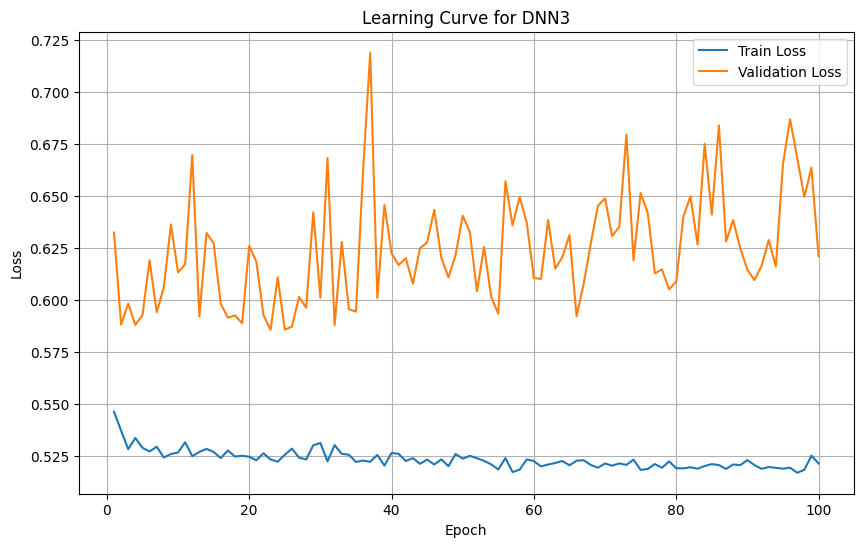

In [81]:
best_params=study.best_params
model = DNN(input_dim=X_train_tensor.shape[1],
              dropout1=best_params["dropout1"],
              dropout2=best_params["dropout2"],
              dropout3=best_params["dropout3"]
              ).to(device)
# 最適化と訓練を実行
optimizer = optim.Adam(model.parameters(), lr=best_params["learning_rate"],weight_decay=best_params["weight_decay"])
criterion = nn.BCELoss()

num_epochs=100
train_losses = []
val_losses = []

model.train()
for epoch in range(num_epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch.squeeze())
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}')

    if val_loader is not None:
        model.eval()  
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = model(X_val).squeeze()
                val_loss = criterion(val_outputs, y_val.squeeze())
                epoch_val_loss += val_loss.item()

        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        model.train()  

    if val_loader is not None:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    else:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
if val_losses:
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve for DNN3')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(f"Shape of X_test_tensor: {X_test_tensor.shape}")


Shape of X_test_tensor: torch.Size([878, 22])


In [ ]:
print(f"Shape of X_test_tensor: {X_train_tensor.shape}")


Shape of X_test_tensor: torch.Size([3157, 22])


Accuracy: 60.14%
Precision: 0.4811
Recall: 0.4130
F1 Score: 0.4444
Matthews Correlation Coefficient: 0.1374
Specificity: 0.7199


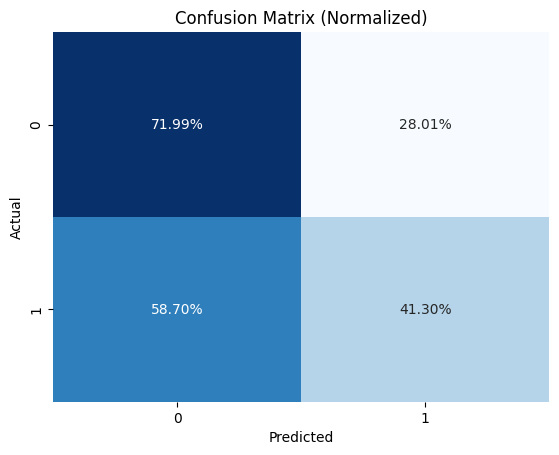

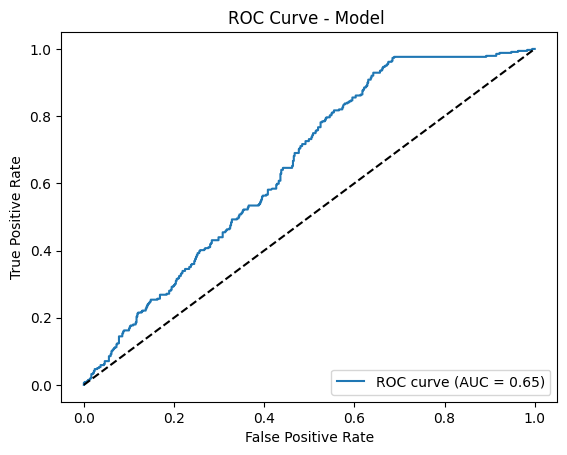

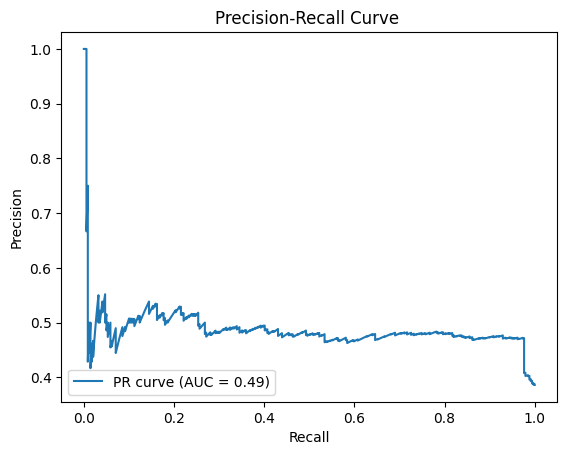

In [ ]:
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)

    # 予測と確率
    test_outputs = model(X_test_tensor).squeeze()
    predictions = (test_outputs >0.49).float()
    y_true = y_test_tensor.cpu().numpy()
    y_pred = predictions.cpu().numpy()
    y_prob = test_outputs.cpu().numpy()

# 評価指標
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    specificity = recall_score(y_true, y_pred, pos_label=0)  
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Matthews Correlation Coefficient: {mcc:.4f}')
    print(f'Specificity: {specificity:.4f}')

    # 混同行列（割合表示）
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (Normalized)")
    plt.show()

    # ROC曲線とAUC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model ')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall曲線
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    plt.plot(recall_curve, precision_curve, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ')
    plt.legend(loc="lower left")
    plt.show()    

In [ ]:
torch.save(model.state_dict(), '../../saved_model/DNN_stack_model2.pth')

